<a href="https://colab.research.google.com/github/Vanduss123/Debt/blob/main/DebtProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

  RQ1:Which debt sectors—households or corporations—show stronger signals before or during past financial crises, as indicated by falling GDP and rising government debt? NOT PURSUED
  
  FINAL RESEARCH QUESTION:
  RQ2: How can debt (total private and central government debt) play a role in the GDP of the economy (predict GDP)?
  



In [ ]:
from scipy.stats import ttest_ind
# group_1 = df[cat_var=="group_1"]['num_var']
# group_2 = df[cat_var == "group_2"]['num_var']
# t_stat, p_val = ttest_ind(group_1, group_2)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Vanduss123/Debt/refs/heads/main/GlobalDebtDatabase.csv')
df.rename(columns={'Total private debt, \nall instruments\n(percent of GDP)': 'Total private debt, inst'}, inplace=True)
df.rename(columns = {'Total private debt, \nloans and debt securities\n(percent of GDP)' : 'Total private debt, lds'}, inplace = True)
df.rename(columns = {'Household debt, all instruments\n(percent of GDP)' : 'Household debt, inst'}, inplace = True)
df.rename(columns = {'Household debt, loans and debt securities\n(percent of GDP)' : 'Household debt, lds'}, inplace = True)
df.rename(columns = {'Non-financial corporations debt, all instruments\n(percent of GDP)' : 'Corp debt, inst'}, inplace = True)
df.rename(columns = {'Non-financial corporations debt, loans and debt securities\n(percent of GDP)' : 'Corp debt, lds'}, inplace = True)
df.rename(columns = {'Public sector debt\n(percent of GDP)' : 'Public sector debt'} , inplace = True)
df.rename(columns = {'General government debt\n(percent of GDP)' : 'General gov debt',
                     'Central government debt\n(percent of GDP)' : 'Central gov debt', 'Nominal gross domestic product\n(billions)' : 'Nominal GDP (billions)'}, inplace = True)
df.info()
df.drop(['Nonfinancial public sector debt\n(percent of GDP)', 'Public sector debt' ], axis = 1, inplace = True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              74 non-null     int64  
 1   Total private debt, inst                          74 non-null     float64
 2   Total private debt, lds                           74 non-null     float64
 3   Household debt, inst                              74 non-null     float64
 4   Household debt, lds                               74 non-null     float64
 5   Corp debt, inst                                   74 non-null     float64
 6   Corp debt, lds                                    74 non-null     float64
 7   Public sector debt                                0 non-null      float64
 8   Nonfinancial public sector debt
(percent of GDP)  0 non-null      float64
 9   General gov debt       

,Year,"Total private debt, inst","Total private debt, lds","Household debt, inst","Household debt, lds","Corp debt, inst","Corp debt, lds",General gov debt,Central gov debt,Nominal GDP (billions)
0,1950,75.83,55.31,25.48,24.80,50.34,30.51,83.13,78.20,301.78
1,1951,72.69,53.66,24.52,23.91,48.17,29.75,72.96,68.20,348.99
2,1952,88.24,56.56,26.60,25.98,61.64,30.58,72.53,66.34,368.03
3,1953,88.05,58.02,28.43,27.79,59.62,30.22,71.75,64.60,389.15
4,1954,106.06,62.57,31.54,30.86,74.52,31.71,73.57,64.96,390.28


Feedback on Data cleaning:
check on all these points whether they are handled or not:

Remove Metadata Rows-Rows 0–4 contain descriptions, sources, and labels—not actual data. You should drop them

Rename Columns Clearly

Drop Columns with Too Many Missing Values

Convert Numeric Columns-All numeric columns (e.g., GDP, debt figures) are currently stored as strings. Convert them

Handle Missing Values

Trim and Clean Strings-Ensure the country names or string fields are stripped of whitespace

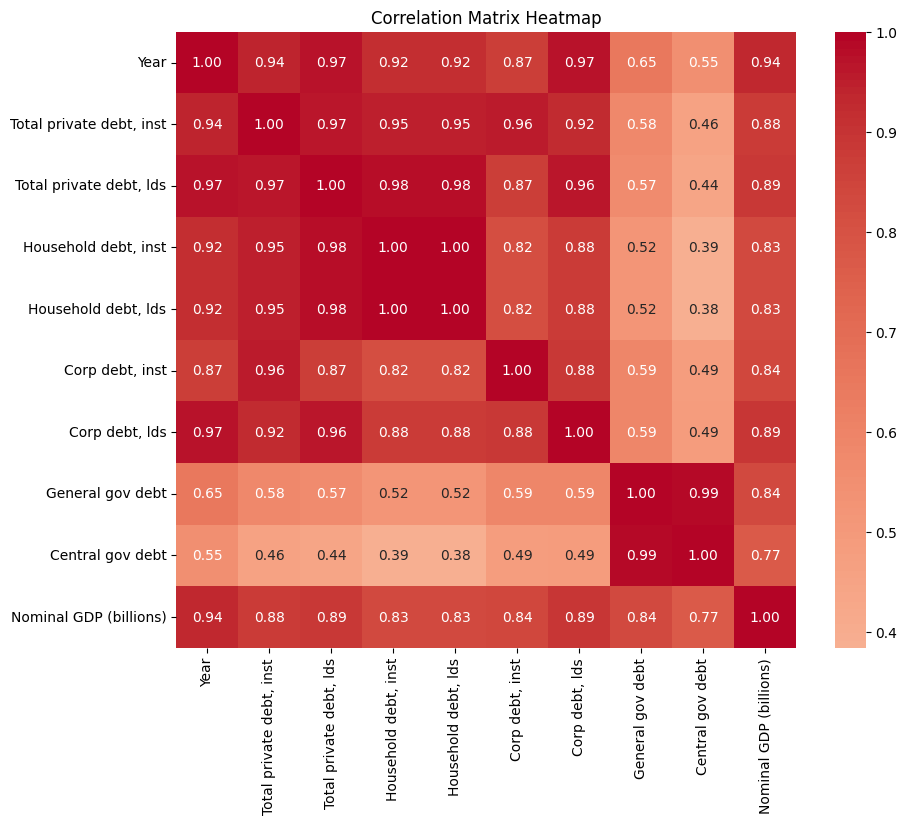

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# df.info()
# df['Year'].head(74) # confirms that there are no duplicates
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust size to your liking
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
''' Possible research questions :
How does debt (household, non-financial corporations and central government debt ) play a role in the GDP of the economy?
How has public sector and government debt affected the total private debt of the economy over the years?
Is household or non-financial corporate data more associated with past financial
crises (marked by a slow in GDP and rise in government debt)
Note that this could also require looking at the time periods of previous
government crises and measuring how debts correlated with those timeframes,
things that may not be present in the current dataset, but may be added as
a new column
'''


' Possible research questions :\nHow does debt (household, non-financial corporations and central government debt ) play a role in the GDP of the economy?\nHow has public sector and government debt affected the total private debt of the economy over the years?\nIs household or non-financial corporate data more associated with past financial\ncrises (marked by a slow in GDP and rise in government debt)\nNote that this could also require looking at the time periods of previous\ngovernment crises and measuring how debts correlated with those timeframes,\nthings that may not be present in the current dataset, but may be added as\na new column\n'

Feedback:
May be you can refine your questions this way:
What is the relationship between household, corporate, and government debt levels and GDP across countries and time?
Does an increase in government debt precede or correlate with changes in private debt levels (households + corporations) over time?
Which debt sectors—households or corporations—show stronger signals before or during past financial crises, as indicated by falling GDP and rising public debt?

In [ ]:
'''
plt.subplot(df['Nominal gross domestic product (billions)'])
plt.subplot(df['Non-financial corporations debt, all instruments (percent of GDP)'])
plt.xlabel("GDP")
plt.ylabel("Corporation Debt")
plt.title("The effect of GDP vs Corporation Debt")
plt.show()
'''

'\nplt.subplot(df[\'Nominal gross domestic product (billions)\'])\nplt.subplot(df[\'Non-financial corporations debt, all instruments (percent of GDP)\'])\nplt.xlabel("GDP")\nplt.ylabel("Corporation Debt")\nplt.title("The effect of GDP vs Corporation Debt")\nplt.show()\n'

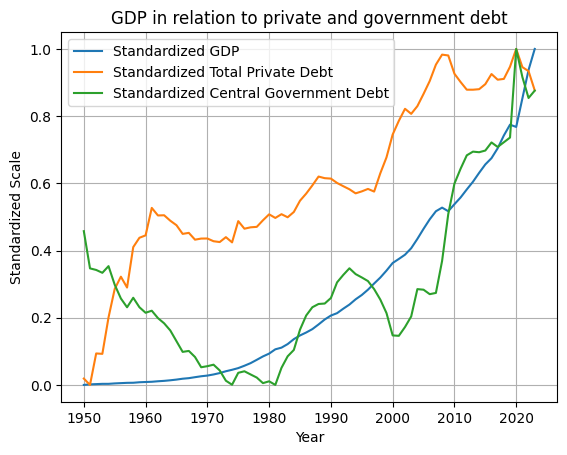

In [ ]:
# Analysis of RQ 1, was eventually abandoned based on feedback from mentor, but graphs were used for RQ 2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

GDP_std = scaler.fit_transform(df[['Nominal GDP (billions)']])
Priv_std = scaler.fit_transform(df[['Total private debt, inst']])
governmentdebt_std = scaler.fit_transform(df[['General gov debt']])
plt.plot(df['Year'], GDP_std, label='Standardized GDP')
plt.plot(df['Year'], Priv_std, label='Standardized Total Private Debt')
plt.plot(df['Year'], governmentdebt_std,label = 'Standardized Central Government Debt')
plt.xlabel('Year')
plt.ylabel('Standardized Scale')
plt.title('GDP in relation to private and government debt')
plt.legend()
plt.grid(True)
plt.show()
# Householddebt_std = scaler.fit_transform(df[['Household debt, all instruments (percent of GDP)']])
#plt.plot(df['Year'], GDP_std, label='Standardized GDP')
#plt.plot(df['Year'], Householddebt_std, label='Standardized Household Debt')
#plt.plot(df['Year'], governmentdebt_std, label = 'Standardized Government Debt')
#plt.xlabel('Year')
#plt.ylabel('Standardized Value')
#plt.title('Predicting Government Crises Through Household Debt')
#plt.legend()
#plt.grid(True)
#plt.show()
#####




5790844.441123417
2406.4173455831424
0.9124900502845491


/tmp/ipython-input-1644650214.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


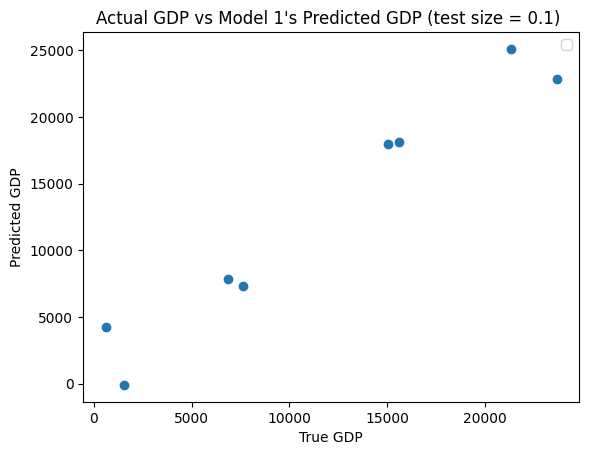

7558079.434164619
2749.1961432689045
0.9164222122828442
Test statistic: 1.6350344869492517e-41
T-statistic: 19.08832665541847, P-value: 1.6350344869492517e-41

T-test results for each coefficient:

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            11.4111     15.848      0.720      0.474     -20.336      43.158
c1            92.2244     40.715      2.265      0.027      10.662     173.787
                                   OLS Regression Results                                  
Dep. Variable:     Nominal GDP (billions)   R-squared (uncentered):                   0.723
Model:                                OLS   Adj. R-squared (uncentered):              0.713
Method:                     Least Squares   F-statistic:                              73.21
Date:                    Sun, 03 Aug 20

In [ ]:
# 2nd research question was chosen as per mentor guidance

from sklearn import model_selection
import numpy as np
import statsmodels.stats.multicomp as mc
features = df[['Total private debt, inst', 'General gov debt']]
label = df['Nominal GDP (billions)']

X_temp, X_test, y_temp, y_test = model_selection.train_test_split(
    features, label, test_size=0.1, random_state=42
)

# Then: split 10% of the remaining 90% for validation
X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X_temp, y_temp, test_size=1/9, random_state=42
)
from sklearn.linear_model import LinearRegression;
model = LinearRegression();
model.fit(X_train, y_train);
pred = model.predict(X_val);
from sklearn.metrics import *;
MSE_1 = mean_squared_error (y_val,pred)
RMSE_1 = root_mean_squared_error(y_val,pred)
R1 = r2_score(y_val,pred)
print (mean_squared_error(y_val, pred))
print(root_mean_squared_error(y_val, pred))
print(r2_score(y_val,pred))

plt.scatter(y_val, pred)

plt.xlabel('True GDP')
plt.ylabel('Predicted GDP')
plt.title("Actual GDP vs Model 1's Predicted GDP (test size = 0.1) ")

plt.legend()
plt.show()
# Now we run the code for the test
pred = model.predict(X_test)
print (mean_squared_error(y_test, pred))
print(root_mean_squared_error(y_test, pred))
print(r2_score(y_test,pred))
# t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['Total private debt, inst'], df['General gov debt'])
print("Test statistic: " + str(p_value))
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# variables are not correlated, interesting
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train).fit()
# Print t-statistics and p-values
print("\nT-test results for each coefficient:\n")
print(ols_model.t_test(np.identity(len(ols_model.params))))
print(ols_model.summary())


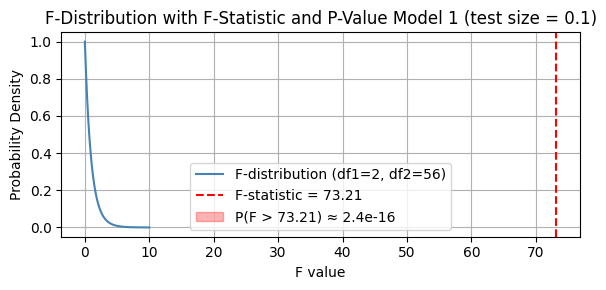

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f


df_model = 2
df_resid = 56
f_stat = 73.21
p_value = 2.36e-16

# Range of F values
x = np.linspace(0, 10, 500)
y = f.pdf(x, dfn=df_model, dfd=df_resid)

# Plot
plt.figure(figsize=(6, 3))
plt.plot(x, y, label=f"F-distribution (df1={df_model}, df2={df_resid})", color='steelblue')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-statistic = {f_stat}')
plt.fill_between(x, y, where=(x > f_stat), color='red', alpha=0.3, label=f'P(F > {f_stat}) ≈ {p_value:.1e}')
plt.title('F-Distribution with F-Statistic and P-Value Model 1 (test size = 0.1)')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


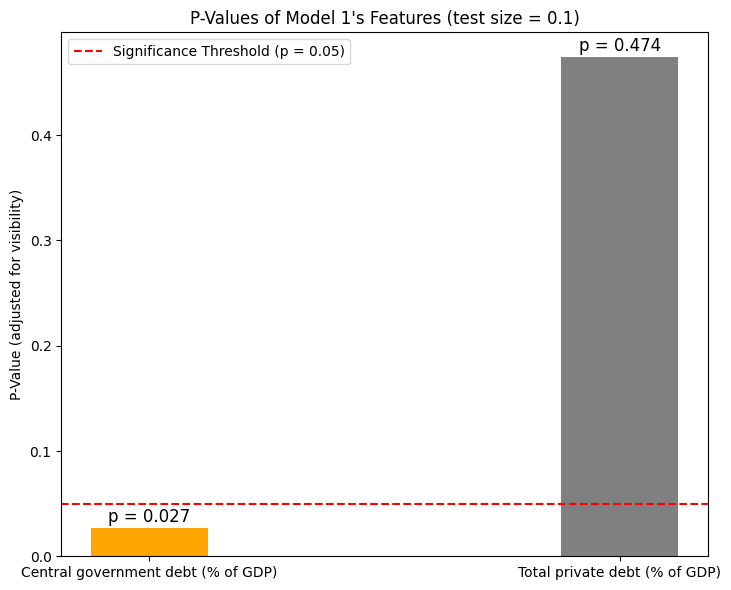

In [ ]:
import matplotlib.pyplot as plt

variables = ["Central government debt (% of GDP)", "Total private debt (% of GDP)"]
p_values_real = [0.027, 0.474]
significance_threshold = 0.05

min_height = 0.01
p_values_display = [max(p, min_height) for p in p_values_real]

bar_colors = ["gray" if p > significance_threshold else "orange" for p in p_values_real]


fig, ax = plt.subplots(figsize=(7.5, 6))
bars = ax.bar(variables, p_values_display, color=bar_colors, width = 0.25)

for bar, real_p in zip(bars, p_values_real):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.002,
        f"p = {real_p:.3f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

ax.axhline(significance_threshold, color='red', linestyle='--', linewidth=1.5, label='Significance Threshold (p = 0.05)')

ax.set_ylabel("P-Value (adjusted for visibility)")
ax.set_title("P-Values of Model 1's Features (test size = 0.1)")
ax.legend()

plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      74 non-null     int64  
 1   Total private debt, inst  74 non-null     float64
 2   Total private debt, lds   74 non-null     float64
 3   Household debt, inst      74 non-null     float64
 4   Household debt, lds       74 non-null     float64
 5   Corp debt, inst           74 non-null     float64
 6   Corp debt, lds            74 non-null     float64
 7   General gov debt          74 non-null     float64
 8   Central gov debt          74 non-null     float64
 9   Nominal GDP (billions)    74 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 5.9 KB
Mean Squared Error: 6451752.058465588
Root Mean Squared Error: 2540.0299325924466
R2 Score: 0.9055932142119695
Test statistic: 1.6350344869492517e-41
T-statistic: 19.08832665541847, P-val

/tmp/ipython-input-2081869817.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


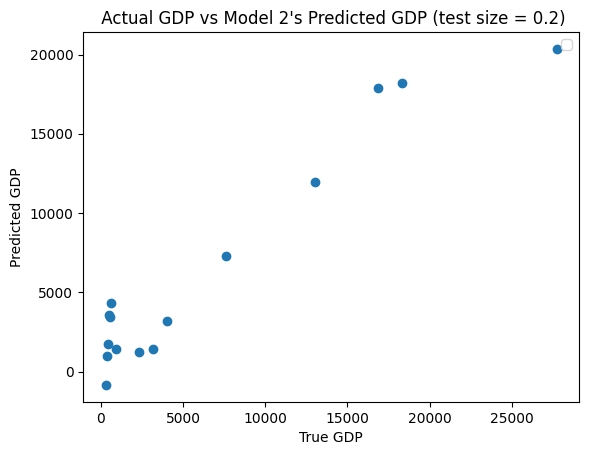

In [ ]:
df.info()
features = df[['Total private debt, inst', 'General gov debt']]
label = df['Nominal GDP (billions)']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features,label, test_size=0.2, random_state=42
)
from sklearn.linear_model import LinearRegression;
model = LinearRegression();
model.fit(X_train, y_train);
pred = model.predict(X_test);
from sklearn.metrics import *;
MSE_2 = mean_squared_error(y_test,pred)
RMSE_2 = root_mean_squared_error(y_test,pred)
R2 = r2_score(y_test,pred)
print ("Mean Squared Error: " + str(mean_squared_error(y_test, pred)))
print("Root Mean Squared Error: " + str(root_mean_squared_error(y_test, pred)))
print("R2 Score: " + str(r2_score(y_test,pred)))
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df['Total private debt, inst'], df['General gov debt'])
print("Test statistic: " + str(p_value))
print(f"T-statistic: {t_stat}, P-value: {p_value}")
# variables are not correlated, interesting
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train).fit()
# Print t-statistics and p-values
print("\nT-test results for each coefficient:\n")
print(ols_model.t_test(np.identity(len(ols_model.params))))
print(ols_model.summary())
plt.scatter(y_test, pred)

plt.xlabel('True GDP')
plt.ylabel('Predicted GDP')
plt.title(" Actual GDP vs Model 2's Predicted GDP (test size = 0.2)")

plt.legend()
plt.show()

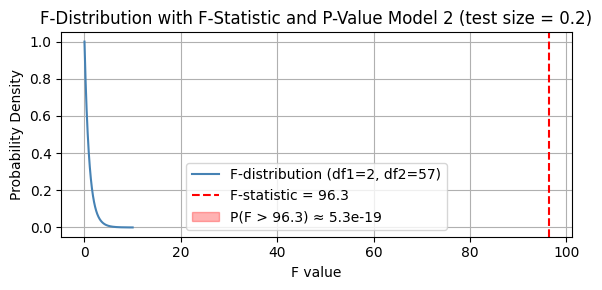

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f


df_model = 2
df_resid = 57
f_stat = 96.30
p_value = 5.27e-19

# Range of F values
x = np.linspace(0, 10, 500)
y = f.pdf(x, dfn=df_model, dfd=df_resid)

# Plot
plt.figure(figsize=(6, 3))
plt.plot(x, y, label=f"F-distribution (df1={df_model}, df2={df_resid})", color='steelblue')
plt.axvline(f_stat, color='red', linestyle='--', label=f'F-statistic = {f_stat}')
plt.fill_between(x, y, where=(x > f_stat), color='red', alpha=0.3, label=f'P(F > {f_stat}) ≈ {p_value:.1e}')
plt.title('F-Distribution with F-Statistic and P-Value Model 2 (test size = 0.2)')
plt.xlabel('F value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

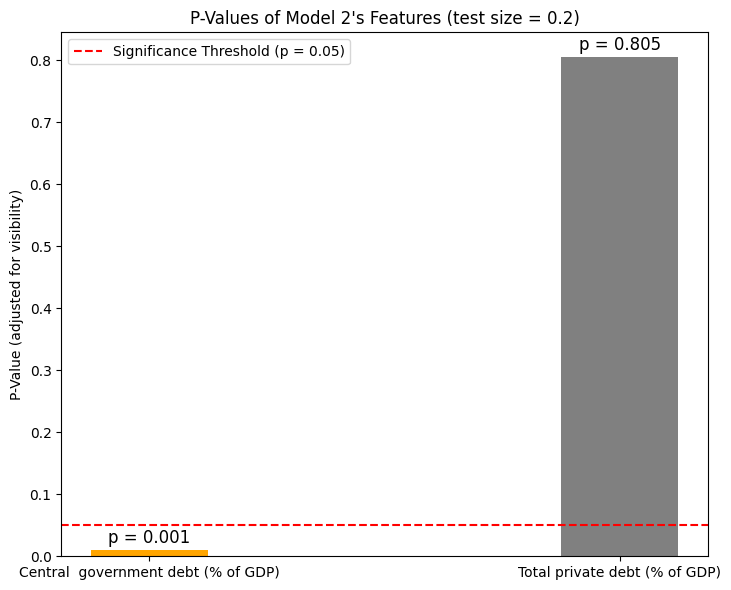

In [ ]:
import matplotlib.pyplot as plt

variables = ["Central government debt (% of GDP)", "Total private debt (% of GDP)"]
p_values_real = [0.001, 0.805]
significance_threshold = 0.05

min_height = 0.01
p_values_display = [max(p, min_height) for p in p_values_real]

bar_colors = ["gray" if p > significance_threshold else "orange" for p in p_values_real]


fig, ax = plt.subplots(figsize=(7.5, 6))
bars = ax.bar(variables, p_values_display, color=bar_colors, width = 0.25)

for bar, real_p in zip(bars, p_values_real):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.005,
        f"p = {real_p:.3f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

ax.axhline(significance_threshold, color='red', linestyle='--', linewidth=1.5, label='Significance Threshold (p = 0.05)')

ax.set_ylabel("P-Value (adjusted for visibility)")
ax.set_title("P-Values of Model 2's Features (test size = 0.2)")
ax.legend()

plt.tight_layout()
plt.show()


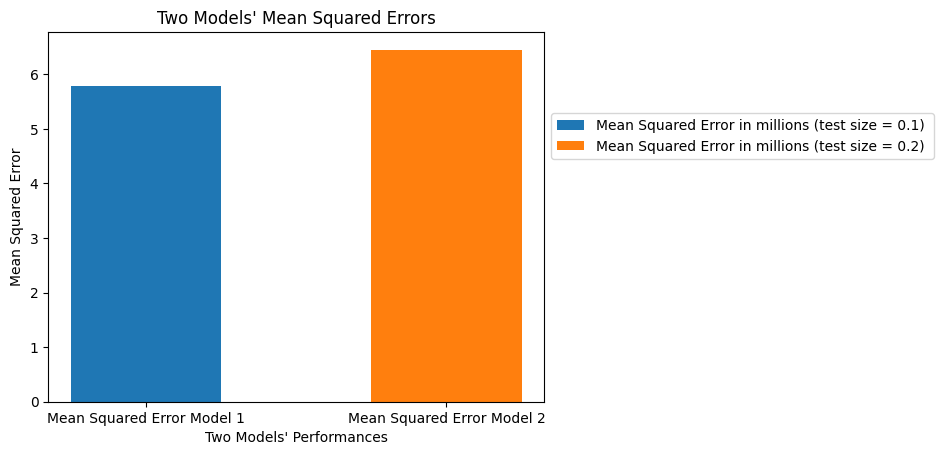

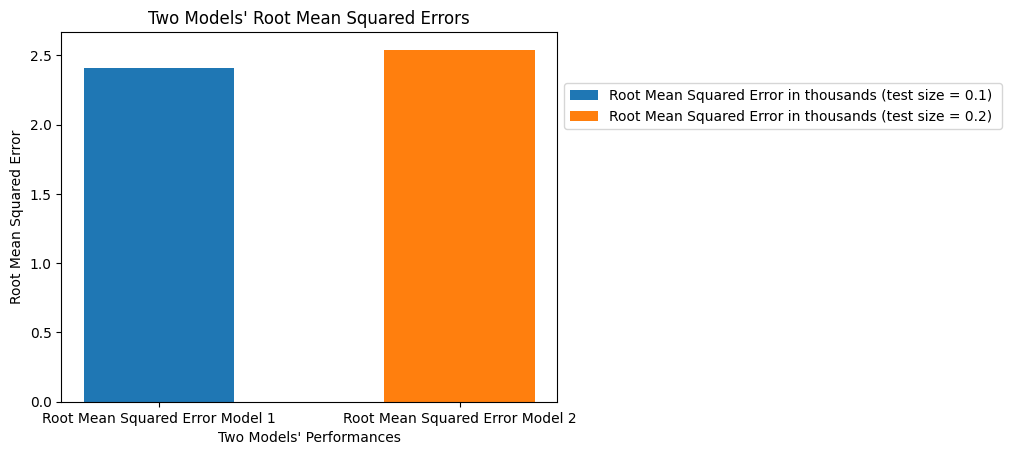

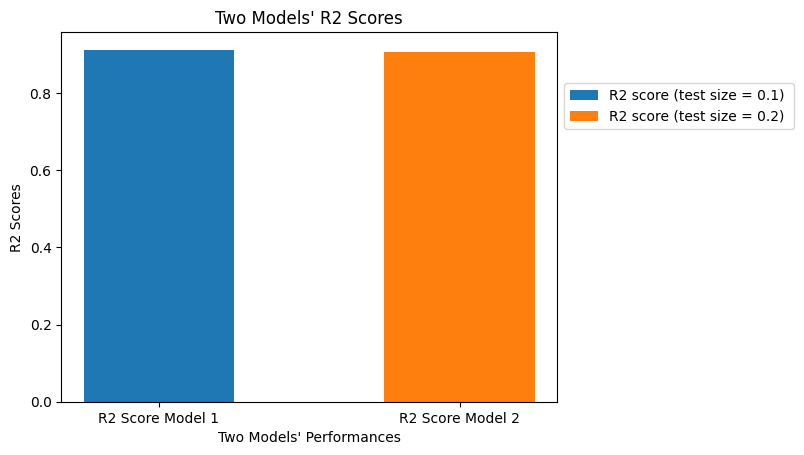

In [ ]:
plt.bar("Mean Squared Error Model 1", (MSE_1/(10 ** 6)), label = "Mean Squared Error in millions (test size = 0.1)", width = 0.5)
plt.bar("Mean Squared Error Model 2", (MSE_2/(10**6)), label = "Mean Squared Error in millions (test size = 0.2) ", width = 0.5)
plt.xlabel("Two Models' Performances")
plt.ylabel("Mean Squared Error")
plt.title("Two Models' Mean Squared Errors")
plt.legend(bbox_to_anchor=(1, 0.8))
plt.show()
plt.bar("Root Mean Squared Error Model 1", (RMSE_1/(10 ** 3)), label = "Root Mean Squared Error in thousands (test size = 0.1)", width = 0.5)
plt.bar("Root Mean Squared Error Model 2", (RMSE_2/(10**3)), label = "Root Mean Squared Error in thousands (test size = 0.2) ", width = 0.5)
plt.xlabel("Two Models' Performances")
plt.ylabel("Root Mean Squared Error")
plt.title("Two Models' Root Mean Squared Errors")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()
plt.bar("R2 Score Model 1", (R1), label = "R2 score (test size = 0.1) ", width = 0.5)
plt.bar("R2 Score Model 2", (R2), label = "R2 score (test size = 0.2) ", width = 0.5)
plt.xlabel("Two Models' Performances")
plt.ylabel("R2 Scores")
plt.title("Two Models' R2 Scores")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

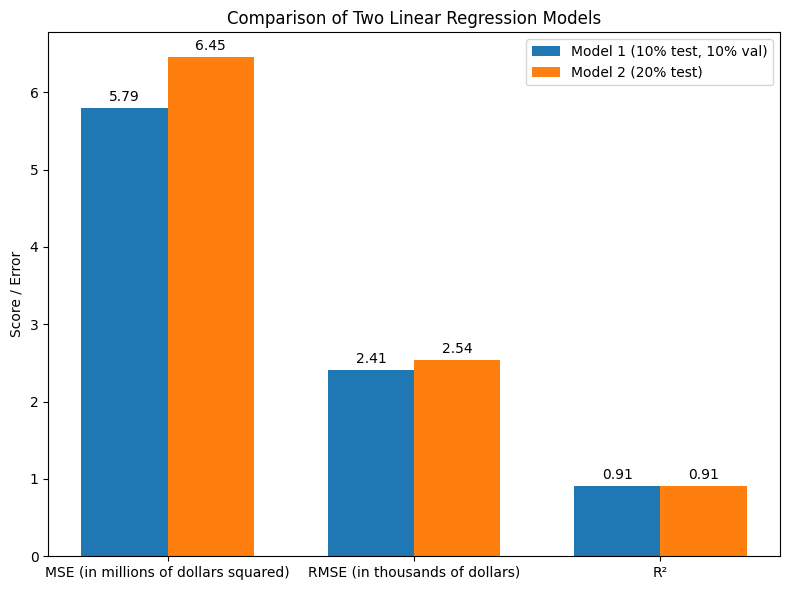

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['MSE (in millions of dollars squared)', 'RMSE (in thousands of dollars)', 'R²']
model1 = [MSE_1 / (10**6), RMSE_1/ (10**3), R1]
model2 = [MSE_2 / (10**6), RMSE_2 / (10**3), R2]

x = np.arange(len(metrics))  # [0, 1, 2]
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, model1, width, label='Model 1 (10% test, 10% val)')
bars2 = ax.bar(x + width/2, model2, width, label='Model 2 (20% test)')

# Add labels and title
ax.set_ylabel('Score / Error')
ax.set_title("Comparison of Two Linear Regression Models")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Optional: show value on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

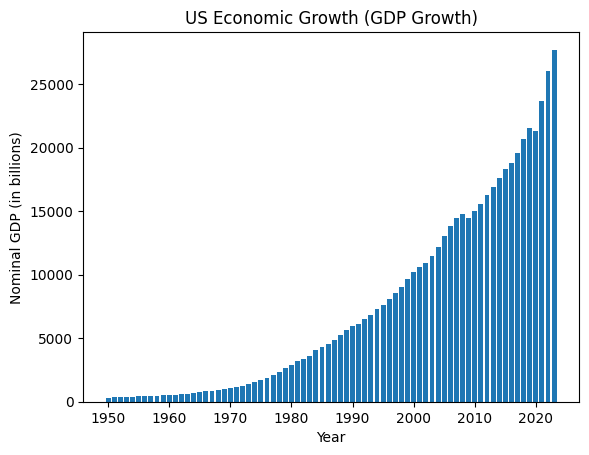

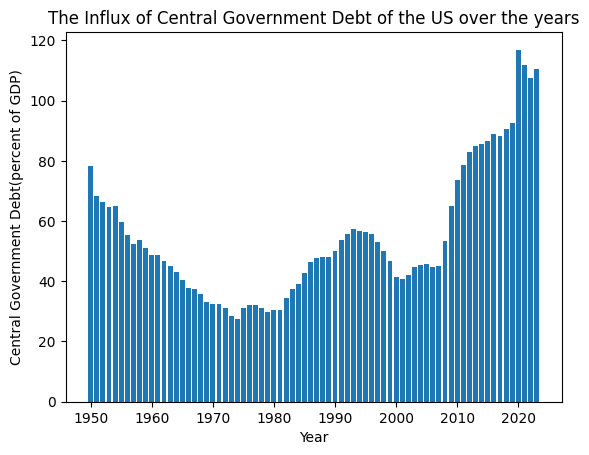

[]

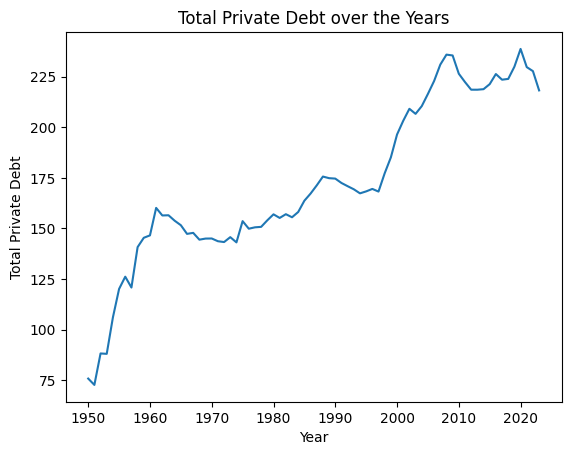

In [ ]:
plt.bar(df['Year'], df['Nominal gross domestic product (billions)'])
plt.xlabel("Year")
plt.ylabel("Nominal GDP (in billions)")
plt.title("US Economic Growth (GDP Growth)")
plt.show()
plt.bar(df['Year'], df['Central government debt (percent of GDP)'])
plt.xlabel("Year")
plt.ylabel("Central Government Debt(percent of GDP)")
plt.title("The Influx of Central Government Debt of the US over the years")
plt.show()
'''plt.plot(df['Nominal gross domestic product (billions)'], df['Central government debt (percent of GDP)'])
plt.xlabel("Nominal GDP (billions)")
plt.ylabel("Central government debt (percent of GDP)")
plt.title("Relationship between GDP and Central Government Debt ")
plt.show()
'''
# it is shown that this is not a linear relationship, maybe not so good for comparison?
plt.plot(df['Year'], df['Total private debt, all instruments (percent of GDP)'])
plt.xlabel("Year")
plt.ylabel("Total Private Debt")
plt.title("Total Private Debt over the Years")
plt.plot()
# this is not linear either, but seems to indicate a positive trend

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# future work: expand on the dataset to other countries, challenges are that I would have to merge multiple datasets into one, and organize them using a different method
url = "https://raw.githubusercontent.com/Vanduss123/Debt/main/TotalPrivateDebt.csv"
priv_df = pd.read_csv(url, encoding="ISO-8859-1")  # or encoding="latin1"
priv_df.replace("no data", np.nan, inplace=True)
priv_df = priv_df.fillna(priv_df.mean(numeric_only=True))
count = 0;
priv_df.iloc[:, 1:] = priv_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
for i in range(len(priv_df)):
    row_values = priv_df.iloc[i, 1:]
    row_mean = row_values.mean(skipna=True)
    priv_df.iloc[i, 1:] = row_values.fillna(row_mean)

priv_df.head()

/tmp/ipython-input-2870181525.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  priv_df.iloc[i, 1:] = row_values.fillna(row_mean)
/tmp/ipython-input-2870181525.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  priv_df.iloc[i, 1:] = row_values.fillna(row_mean)
/tmp/ipython-input-2870181525.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

,"Private debt, all instruments (Percent of GDP)",1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Austria,153.91739,153.91739,153.91739,153.91739,153.91739,153.91739,153.91739,153.91739,153.91739,...,163.123627,162.002537,163.309825,163.395619,164.897666,162.593870,174.024111,176.024217,160.530742,153.91739
1,Belgium,220.145225,220.145225,220.145225,220.145225,220.145225,220.145225,220.145225,220.145225,220.145225,...,247.714467,247.910063,272.058644,257.751996,259.331542,255.266984,264.054211,252.033844,243.07587,228.489317
2,Brazil,104.622316,104.622316,104.622316,104.622316,104.622316,104.622316,104.622316,104.622316,104.622316,...,123.965079,132.848893,124.741105,76.737607,80.362517,84.653283,94.402647,92.064905,104.622316,104.622316
3,Bulgaria,171.852028,171.852028,171.852028,171.852028,171.852028,171.852028,171.852028,171.852028,171.852028,...,248.578428,223.121366,215.172215,201.703268,198.726976,196.373980,200.946076,188.966111,175.491924,171.621415
4,Canada,216.900344,216.900344,216.900344,216.900344,216.900344,216.900344,216.900344,216.900344,216.900344,...,242.114735,257.912442,266.997016,269.035723,272.755342,278.193030,305.438799,285.538529,267.965431,269.120029


In [ ]:
url = "https://raw.githubusercontent.com/Vanduss123/Debt/main/TotalPrivateDebt.csv"
priv_df = pd.read_csv(url, encoding="ISO-8859-1")  # or encoding="latin1"
priv_df.replace("no data", np.nan, inplace=True)
priv_df = priv_df.fillna(priv_df.mean(numeric_only=True))
count = 0;
priv_df.iloc[:, 1:] = priv_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
for i in range(len(priv_df)):
    row_values = priv_df.iloc[i, 1:]
    row_mean = row_values.mean(skipna=True)
    priv_df.iloc[i, 1:] = row_values.fillna(row_mean)
values_to_drop = [ '©IMF, 2025']
priv_df.drop(index=[44, 45], inplace=True)
priv_df.iloc[0:]

NameError: name 'pd' is not defined

In [ ]:
priv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 75 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Private debt, all instruments (Percent of GDP)  45 non-null     object 
 1   1950                                            46 non-null     object 
 2   1951                                            46 non-null     object 
 3   1952                                            46 non-null     object 
 4   1953                                            46 non-null     object 
 5   1954                                            46 non-null     object 
 6   1955                                            46 non-null     object 
 7   1956                                            46 non-null     object 
 8   1957                                            46 non-null     object 
 9   1958                                         